In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
file1=pd.read_excel('C:/Users/Justincul/Documents/Bracket_Stuff/Final_year_project/All Measurements.xlsx')
y= []
y.append(file1['Chest'])

In [3]:
from os import listdir
from os.path import isfile, join
from skimage import io
import numpy as np
import cv2

Train_data = []
Train_chest = []

Test_data = []
Test_chest = []

mypath = r'C:/Users/Justincul/Documents/Bracket_Stuff/Final_year_project/project_images/front'
for f in range(0, file1.shape[0]):
    im6 = cv2.imread(join(mypath, file1.iloc[f]['Front_Img_name']))
    image_copy = cv2.cvtColor(im6, cv2.COLOR_BGR2RGB)
    image_resize= cv2.resize(image_copy,(224, 224))
    #image_copy = np.float32(image_copy)
    
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    gray_resize= cv2.resize(gray,(224, 224))
    
    dst = cv2.cornerHarris(gray_resize, 2, 3, .04)
    dst = cv2.dilate(dst, None)
    
    thresh = 0.1*dst.max()
    
    #print(gray_resize)
    corner_image = np.copy(image_resize)
    for j in range(0, dst.shape[0]):
        for i in range(0, dst.shape[1]):
            if(dst[j,i] > thresh):
                cv2.circle(corner_image, (i,j), 1, (0,255,0), 1)
    vec6 = np.reshape(corner_image, [1, (224*224*3)])
    if (file1.iloc[f]['Is_train']):
        Test_data.append(vec6)
        Test_chest.append(file1.iloc[f]['Chest'])
    else:
        Train_data.append(vec6)
        Train_chest.append(file1.iloc[f]['Chest'])
        
Train_chest = (np.array(Train_chest).astype(np.float32))
Train_data = np.matrix(np.array(Train_data))

Test_chest = (np.array(Test_chest).astype(np.float32))
Test_data = np.matrix(np.array(Test_data))
   

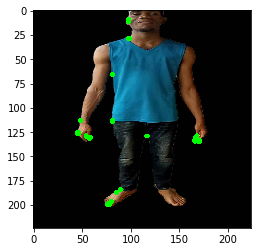

In [4]:
plt.imshow(corner_image)    

In [5]:
#vec6 = np.reshape(vec6, (1, 150528))
vec6.shape


(1, 150528)

In [6]:
gray_resize.shape

(224, 224)

In [7]:
Test_data.shape

(40, 150528)

In [8]:
Train_data.shape

(800, 150528)

In [9]:
np.sum(Test_data[1] - Test_data[2])

5026223

In [10]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
Train_chest_encoded = lab_enc.fit_transform(Train_chest)
print(Train_chest_encoded)
print(utils.multiclass.type_of_target(Train_chest))
print(utils.multiclass.type_of_target(Train_chest.astype('int')))
print(utils.multiclass.type_of_target(Train_chest_encoded))

[11 11 11 11 11  7  7  7  7  7 12 12 12 12 12  7  7  7  7  7  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  7  7  7  7  7  9  9  9  9  9  8  8  8
  8  8  6  6  6  6  6  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  9  9  9  9  9  5  5  5  5  5  6  6  6  6  6  5  5  5  5  5  6
  6  6  6  6  9  9  9  9  9  4  4  4  4  4  3  3  3  3  3  6  6  6  6  6
  6  6  6  6  6  3  3  3  3  3  5  5  5  5  5  5  5  5  5  5  8  8  8  8
  8  6  6  6  6  6  4  4  4  4  4  7  7  7  7  7  7  7  7  7  7  5  5  5
  5  5  6  6  6  6  6  5  5  5  5  5  2  2  2  2  2  4  4  4  4  4  7  7
  7  7  7  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7  7  7  4
  4  4  4  4  9  9  9  9  9  3  3  3  3  3  5  5  5  5  5  9  9  9  9  9
  8  8  8  8  8  5  5  5  5  5  3  3  3  3  3 10 10 10 10 10  3  3  3  3
  3  6  6  6  6  6  8  8  8  8  8  1  1  1  1  1  6  6  6  6  6 14 14 14
 14 14  6  6  6  6  6  4  4  4  4  4  6  6  6  6  6  5  5  5  5  5  5  5
  5  5  5  4  4  4  4  4  9  9  9  9  9  4  4  4  4

In [11]:
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

Lr = LinearRegression()
Lr.fit(Train_data, Train_chest)
print("LinearRegression")
Predicted_lr =Lr.predict(Test_data)
print(Predicted_lr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_lr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_lr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_lr)))

Error_lr = (abs(Test_chest - Predicted_lr))
print("The Max Error is", np.max(Error_lr))

print("The Min Error is", np.min(Error_lr))

LinearRegression
[11.92128143 13.92146651 11.72294062 11.37841486 13.20501208 12.05972031
 12.6608936  12.31683664 13.65035342 12.98346731 12.96856671 12.33137959
 11.53939306 11.05530584 12.68477975 12.376255   11.91000598 10.98842055
 11.73064802 12.83054366 11.4528723  11.0235871  11.50460248 12.8095186
 11.21069793 12.46462583 11.66913562 13.48780377 11.58538483 13.42525546
 12.05144652 12.76988385 12.64256939 16.58549205 13.28908653 14.36875646
 16.23898638 15.72755323 15.2860056  13.03821505]
The MAE is  1.5605060839187643
The MSE is  3.770098551785202
The RMSE is  1.9416741621047549
The Max Error is 4.589994019546582
The Min Error is 0.0854920511804167


In [12]:
svr = svm.SVR()
svr.fit(Train_data, Train_chest)
print("SVR")
Predicted_svr = svr.predict(Test_data)
print(Predicted_svr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_svr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_svr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_svr)))

Error_svr = (abs(Test_chest - Predicted_svr))
print("The Max Error is", np.max(Error_svr))

print("The Min Error is", np.min(Error_svr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR
[13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494 13.00759494
 13.00759494 13.00759494 13.00759494 13.00759494]
The MAE is  1.3757594936708886
The MSE is  3.195500721038281
The RMSE is  1.7875963529382917
The Max Error is 3.5075949367088857
The Min Error is 0.007594936708885669


In [16]:
LogReg = LogisticRegression()
LogReg.fit(Train_data, Train_chest_encoded)
print("LogisticRegression")
Predicted_lgr = LogReg.predict(Test_data)
print(Predicted_lgr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_lgr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_lgr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_lgr)))

Error_lgr = (abs(Test_chest - Predicted_lgr))
print("The Max Error is", np.max(Error_lgr))

print("The Min Error is", np.min(Error_lgr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
[ 6  9  5  5  7  5  5  7  9  7  7  7  4  7  5  6  5  7  4  6  3  7  4  5
  5  6 10 10  5 13  5  7  7 12  5  7 12 11  9  7]
The MAE is  6.475
The MSE is  47.45
The RMSE is  6.88839603971781
The Max Error is 11.5
The Min Error is 2.0


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
model_name = "Decision Tree Regressor"
decisionTreeRegressor = DecisionTreeRegressor()

#dtr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', decisionTreeRegressor)]) 
decisionTreeRegressor.fit(Train_data, Train_chest)
y_pred_dtr = decisionTreeRegressor.predict(Test_data)

print(decisionTreeRegressor)
print(y_pred_dtr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, y_pred_dtr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, y_pred_dtr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, y_pred_dtr)))

Error_dtr = (abs(Test_chest - y_pred_dtr))
print("The Max Error is", np.max(Error_dtr))

print("The Min Error is", np.min(Error_dtr))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[12.  12.5 10.5 12.5 12.  12.  13.  12.  10.  13.  13.  13.5 12.  13.
 12.  12.5 12.5 13.  10.  13.  11.5 13.  13.  12.5 13.  12.5 14.5 14.
 12.  14.  18.  15.  13.  14.5 16.  11.5 13.5 14.  12.  17. ]
The MAE is  1.4875
The MSE is  3.55625
The RMSE is  1.885802216564611
The Max Error is 4.0
The Min Error is 0.0


In [18]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"
rfr_model = RandomForestRegressor()
#rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)]) 

rfr_model.fit(Train_data, Train_chest)
y_pred_rfr = rfr_model.predict(Test_data)
print(y_pred_rfr)

print("The MAE is", metrics.mean_absolute_error(Test_chest, y_pred_rfr))

print("The MSE is", metrics.mean_squared_error(Test_chest, y_pred_rfr))

print("The RMSE is", np.sqrt(metrics.mean_squared_error(Test_chest, y_pred_rfr)))

Error_rfr = (abs(Test_chest -  y_pred_rfr))
print("The Max Error is", np.max(Error_rfr))

print("The Min Error is", np.min(Error_rfr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[13.25 12.6  13.2  13.1  12.5  12.7  13.45 12.4  12.85 12.8  13.1  12.65
 12.4  13.   12.2  13.2  12.85 13.   12.5  13.   12.6  12.95 13.45 12.5
 12.7  12.7  11.15 13.35 13.15 13.2  13.9  13.7  13.7  13.25 14.25 13.6
 13.85 13.85 14.7  13.  ]
The MAE is 1.2425000000000002
The MSE is 2.6873750000000003
The RMSE is 1.639321505989597
The Max Error is 3.8499999999999996
The Min Error is 0.0
